In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/singleimage/mala.jpg


In [6]:
!pip install -q datasets

In [7]:
from datasets import load_dataset
dataset = load_dataset("Matthijs/snacks")
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 4838
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 952
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 955
    })
})


In [8]:
print(dataset["train"].features['label'].names)

['apple', 'banana', 'cake', 'candy', 'carrot', 'cookie', 'doughnut', 'grape', 'hot dog', 'ice cream', 'juice', 'muffin', 'orange', 'pineapple', 'popcorn', 'pretzel', 'salad', 'strawberry', 'waffle', 'watermelon']


In [9]:
labels = dataset["train"].features['label'].names
num_labels = len(dataset["train"].features["label"].names)
print(num_labels)
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = i
    id2label[i] = label

print(label2id)
    

20
{'apple': 0, 'banana': 1, 'cake': 2, 'candy': 3, 'carrot': 4, 'cookie': 5, 'doughnut': 6, 'grape': 7, 'hot dog': 8, 'ice cream': 9, 'juice': 10, 'muffin': 11, 'orange': 12, 'pineapple': 13, 'popcorn': 14, 'pretzel': 15, 'salad': 16, 'strawberry': 17, 'waffle': 18, 'watermelon': 19}


In [10]:
import torch
import torch.nn as nn

toy_img = torch.rand(1,3,48,48)
num_channels = 3
hidden_size = 768
patch_size = 16

In [11]:
#convolution 2D layer
projection = nn.Conv2d(num_channels, hidden_size, kernel_size=patch_size, stride=patch_size)

In [12]:
out_projection = projection(toy_img)
print(f'Original image size: {toy_img.size()}')
print(f'Size after projection: {out_projection.size()}')

patch_embeddings = out_projection.flatten(2).transpose(1,2)
print(f'patch embedding size: {patch_embeddings.size()}')

Original image size: torch.Size([1, 3, 48, 48])
Size after projection: torch.Size([1, 768, 3, 3])
patch embedding size: torch.Size([1, 9, 768])


In [13]:
batch_size = 1
cls_token = nn.Parameter(torch.randn(1,1,hidden_size))
cls_tokens = cls_token.expand(batch_size,-1,-1)

print(cls_tokens)

tensor([[[ 1.5505e+00,  1.6740e+00,  9.6606e-01, -1.3278e+00,  2.5502e+00,
          -1.2388e+00, -1.5392e-01, -4.4459e-01,  6.0556e-01,  9.4212e-01,
           1.1844e+00, -9.6484e-02,  1.0385e+00, -8.9128e-01, -4.6882e-01,
          -6.6125e-01,  2.1375e-01,  7.8722e-02,  2.4535e-01,  9.9962e-01,
           1.3859e+00, -1.9187e+00,  6.4288e-01, -3.0128e-01,  5.6808e-01,
           7.2846e-01,  6.1839e-01,  9.8423e-01, -1.9431e+00, -5.5646e-01,
          -1.3690e+00, -8.1876e-01,  1.5483e+00,  4.8391e-01,  2.6368e-01,
           2.3887e-01, -1.3734e-04, -5.8723e-01,  1.9602e-01,  2.6093e-01,
           2.9889e-01,  1.0209e+00,  9.9833e-02,  6.5371e-01, -2.2643e-01,
          -1.3466e+00, -1.8020e-01, -6.8462e-01, -1.1646e+00,  7.0405e-01,
          -4.4533e-01, -1.0753e+00, -1.1578e+00, -9.5431e-01,  6.5733e-01,
          -9.2145e-02, -4.9669e-01, -1.4437e+00, -4.7205e-01, -6.8380e-01,
           1.7622e-01, -6.7312e-02, -1.5348e+00, -9.6540e-01,  6.9866e-01,
           9.2283e-01, -7

In [19]:
patch_embeddings = torch.cat((cls_tokens, patch_embeddings), dim=1)
print(f'Patch embedding size: {patch_embeddings.size()}')

Patch embedding size: torch.Size([1, 12, 768])


In [23]:
position_embeddings = nn.Parameter(torch.randn(batch_size,12,hidden_size))
print(position_embeddings)

Parameter containing:
tensor([[[-1.5146,  0.7534, -1.9216,  ..., -0.1586, -2.2055, -0.7684],
         [ 0.5127,  2.3312,  0.7298,  ..., -0.0308,  1.1660,  0.3914],
         [ 0.5184,  0.8371,  0.3751,  ...,  1.7763,  0.8014, -1.3370],
         ...,
         [-0.2539,  1.4469, -1.3147,  ...,  0.4302, -1.3097,  0.5008],
         [-0.3338, -1.0037, -1.2407,  ..., -0.0880,  0.0753, -0.7602],
         [-0.1134,  0.5036, -0.8180,  ..., -0.0343,  0.2298,  1.4785]]],
       requires_grad=True)


In [24]:
input_embeddings = patch_embeddings+position_embeddings
print(f'input embeddings: {input_embeddings}')
print(f'input embeddings size: {input_embeddings.size()}')

input embeddings: tensor([[[ 0.0359,  2.4274, -0.9555,  ..., -0.4448, -2.6806, -1.3586],
         [ 2.0631,  4.0052,  1.6959,  ..., -0.3170,  0.6908, -0.1988],
         [ 2.0689,  2.5111,  1.3411,  ...,  1.4901,  0.3262, -1.9272],
         ...,
         [ 0.0841,  0.9059, -1.4087,  ...,  0.4998, -0.9267,  0.3521],
         [ 0.1888, -1.5023, -1.2440,  ...,  0.2183,  0.5483, -1.0346],
         [ 0.1910,  0.2540, -1.0229,  ...,  0.0143,  0.6096,  1.5901]]],
       grad_fn=<AddBackward0>)
input embeddings size: torch.Size([1, 12, 768])


In [27]:

# Define parameters for ViT-base (example)
num_heads = 12
num_layers = 12

# Define Transformer encoders' stack
transformer_encoder_layer = nn.TransformerEncoderLayer(
           d_model=hidden_size, nhead=num_heads,
           dim_feedforward=int(hidden_size * 4),
           dropout=0.1)
transformer_encoder = nn.TransformerEncoder(
           encoder_layer=transformer_encoder_layer,
           num_layers=num_layers)

# Forward pass
output_embeddings = transformer_encoder(input_embeddings)
print(f' Output embedding size: {output_embeddings}')
print(f' Output embedding size: {output_embeddings.size()}')

 Output embedding size: tensor([[[ 0.7161, -0.8836, -1.4298,  ..., -0.1427, -0.5692,  0.2863],
         [ 0.1829, -0.3819, -1.2515,  ...,  1.1651,  0.9487,  1.5515],
         [-0.4747, -0.0033, -0.8361,  ..., -0.0753, -0.6972,  1.2933],
         ...,
         [-0.5859,  1.0392, -1.4836,  ..., -0.6189,  0.8329,  0.9146],
         [ 0.8736,  1.0301, -1.6177,  ...,  0.5466,  1.6149, -0.9300],
         [ 0.6915,  0.5670, -0.8506,  ...,  1.6778,  0.4283,  0.4416]]],
       grad_fn=<NativeLayerNormBackward0>)
 Output embedding size: torch.Size([1, 12, 768])


In [28]:
!pip install transformers

In [29]:
from transformers import ViTModel
model_checkpoint = 'google/vit-base-patch16-224-in21k'
print(model_checkpoint)
model = ViTModel.from_pretrained(model_checkpoint,add_pooling_layer=False)
print(model)

google/vit-base-patch16-224-in21k


Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTModel: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing ViTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


ViTModel(
  (embeddings): ViTEmbeddings(
    (patch_embeddings): ViTPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): ViTEncoder(
    (layer): ModuleList(
      (0-11): 12 x ViTLayer(
        (attention): ViTSdpaAttention(
          (attention): ViTSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): ViTSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): ViTIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
          (intermediate_act_fn): GELUAct

In [30]:
input_img = torch.rand(batch_size, num_channels, 224, 224)
print(f'input image: {input_img}')
print(f'input image size:{input_img.size()}')

input image: tensor([[[[3.4603e-01, 2.0592e-01, 7.1667e-01,  ..., 9.3063e-01,
           7.2102e-01, 4.3449e-01],
          [4.7852e-02, 7.7819e-01, 7.8962e-01,  ..., 4.0909e-01,
           4.4393e-01, 6.5447e-02],
          [5.0476e-01, 1.6325e-01, 7.7097e-02,  ..., 8.1097e-01,
           1.4348e-01, 4.1205e-01],
          ...,
          [9.4581e-01, 4.5619e-01, 3.9574e-01,  ..., 9.6877e-01,
           3.4868e-01, 3.8698e-01],
          [1.4674e-01, 4.6578e-01, 6.3799e-01,  ..., 7.1290e-01,
           9.0668e-01, 3.8177e-01],
          [6.9537e-01, 8.5349e-01, 8.1153e-01,  ..., 6.5521e-01,
           5.5411e-01, 2.2644e-01]],

         [[2.1935e-01, 5.5625e-02, 1.7680e-01,  ..., 5.6300e-01,
           1.2437e-01, 2.4229e-01],
          [9.9325e-01, 7.2793e-01, 4.6364e-01,  ..., 4.4609e-01,
           4.8403e-01, 2.9939e-01],
          [9.7292e-01, 2.9309e-01, 9.9244e-01,  ..., 5.0631e-01,
           1.8554e-01, 4.7368e-01],
          ...,
          [8.5066e-01, 4.7437e-01, 2.1727e-01,

In [31]:
output_embedding = model(input_img)
print(output_embedding)
print(f"output embedding size: {output_embedding['last_hidden_state'].size()}")

BaseModelOutputWithPooling(last_hidden_state=tensor([[[-0.1011, -0.3355,  0.0470,  ...,  0.1473,  0.1049, -0.3463],
         [-0.1330, -0.2368, -0.1083,  ..., -0.0720,  0.1806, -0.2076],
         [-0.1111, -0.3693,  0.0274,  ...,  0.0959,  0.1753, -0.2205],
         ...,
         [ 0.0820, -0.1133,  0.0151,  ...,  0.0089,  0.0986, -0.3088],
         [-0.2657, -0.4567, -0.0878,  ...,  0.2280,  0.1578, -0.2659],
         [ 0.1386, -0.1307,  0.0117,  ...,  0.0789,  0.1261, -0.1781]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=None, hidden_states=None, attentions=None)
output embedding size: torch.Size([1, 197, 768])


In [32]:
num_labels = 20

# Define linear classifier layer
classifier = nn.Linear(hidden_size, num_labels) 

# Forward pass on the output embedding of [CLS] token
output_classification = classifier(output_embedding['last_hidden_state'][:, 0, :])
print(f"Output embedding size: {output_classification.size()}")

Output embedding size: torch.Size([1, 20])


In [33]:
import numpy as np
import torch
import cv2
import torch.nn as nn
from transformers import ViTModel, ViTConfig
from torchvision import transforms
from torch.optim import Adam
from torch.utils.data import DataLoader
from tqdm import tqdm

#Pretrained model checkpoint
model_checkpoint = 'google/vit-base-patch16-224-in21k'
     

class ImageDataset(torch.utils.data.Dataset):

  def __init__(self, input_data):
        
      self.input_data = input_data
      # Transform input data
      self.transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((224, 224), antialias=True),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], 
                             std=[0.5, 0.5, 0.5])
        ])

  def __len__(self):
      return len(self.input_data)
    
  def get_images(self, idx):
      return self.transform(self.input_data[idx]['image'])
  
  def get_labels(self, idx):
      return self.input_data[idx]['label']
  
  def __getitem__(self, idx):
      # Get input data in a batch
      train_images = self.get_images(idx)
      train_labels = self.get_labels(idx)

      return train_images, train_labels
     

class ViT(nn.Module):

  def __init__(self, config=ViTConfig(), num_labels=20, 
               model_checkpoint='google/vit-base-patch16-224-in21k'):

        super(ViT, self).__init__()

        self.vit = ViTModel.from_pretrained(model_checkpoint, add_pooling_layer=False)
        self.classifier = (
            nn.Linear(config.hidden_size, num_labels) 
        )

  def forward(self, x):

    x = self.vit(x)['last_hidden_state']
    # Use the embedding of [CLS] token
    output = self.classifier(x[:, 0, :])

    return output

In [34]:
def model_train(dataset, epochs, learning_rate, bs):

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # Load nodel, loss function, and optimizer
    model = ViT().to(device)
    criterion = nn.CrossEntropyLoss().to(device)
    optimizer = Adam(model.parameters(), lr=learning_rate)

    # Load batch image
    train_dataset = ImageDataset(dataset)
    train_dataloader = DataLoader(train_dataset, num_workers=1, batch_size=bs, shuffle=True)

    # Fine tuning loop
    for i in range(epochs):
        total_acc_train = 0
        total_loss_train = 0.0

        for train_image, train_label in tqdm(train_dataloader):
            output = model(train_image.to(device))
            loss = criterion(output, train_label.to(device))
            acc = (output.argmax(dim=1) == train_label.to(device)).sum().item()
            total_acc_train += acc
            total_loss_train += loss.item()

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        print(f'Epochs: {i + 1} | Loss: {total_loss_train / len(train_dataset): .3f} | Accuracy: {total_acc_train / len(train_dataset): .3f}')

    return model

# Hyperparameters
EPOCHS = 10
LEARNING_RATE = 1e-4
BATCH_SIZE = 8

# Train the model
trained_model = model_train(dataset['train'], EPOCHS, LEARNING_RATE, BATCH_SIZE)
     

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTModel: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing ViTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 605/605 [01:39<00:00,  6.10it/s]


Epochs: 1 | Loss:  0.122 | Accuracy:  0.839


100%|██████████| 605/605 [01:38<00:00,  6.14it/s]


Epochs: 2 | Loss:  0.029 | Accuracy:  0.948


100%|██████████| 605/605 [01:38<00:00,  6.14it/s]


Epochs: 3 | Loss:  0.018 | Accuracy:  0.967


100%|██████████| 605/605 [01:38<00:00,  6.14it/s]


Epochs: 4 | Loss:  0.014 | Accuracy:  0.972


100%|██████████| 605/605 [01:38<00:00,  6.14it/s]


Epochs: 5 | Loss:  0.012 | Accuracy:  0.973


100%|██████████| 605/605 [01:38<00:00,  6.14it/s]


Epochs: 6 | Loss:  0.010 | Accuracy:  0.978


100%|██████████| 605/605 [01:38<00:00,  6.15it/s]


Epochs: 7 | Loss:  0.006 | Accuracy:  0.988


100%|██████████| 605/605 [01:38<00:00,  6.15it/s]


Epochs: 8 | Loss:  0.014 | Accuracy:  0.970


100%|██████████| 605/605 [01:38<00:00,  6.14it/s]


Epochs: 9 | Loss:  0.009 | Accuracy:  0.980


100%|██████████| 605/605 [01:38<00:00,  6.14it/s]

Epochs: 10 | Loss:  0.007 | Accuracy:  0.984


In [36]:
def predict(img):

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((224, 224)),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], 
                             std=[0.5, 0.5, 0.5])
        ])
    
    img = transform(img)
    output = trained_model(img.unsqueeze(0).to(device))
    prediction = output.argmax(dim=1).item()

    return id2label[prediction]

In [37]:
dataset['test'].shape

(952, 2)

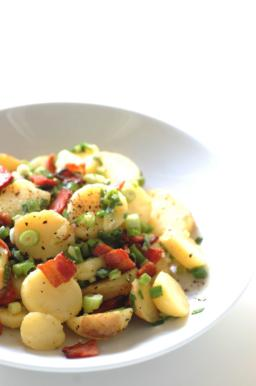

In [38]:
dataset['test'][800]['image']

In [39]:
print(predict(dataset['test'][800]['image']))

salad


In [43]:
import matplotlib.pyplot as plt

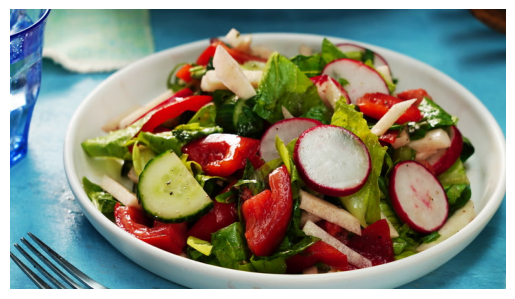

In [44]:
#image taken from internet (1)

img=cv2.imread('/kaggle/input/singleimage/mala.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.show()


In [45]:
predict(img_rgb)

'salad'

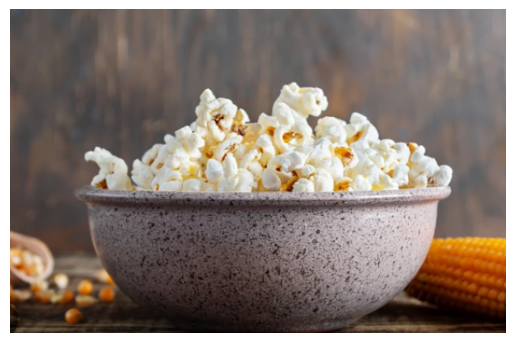

In [47]:
#image taken from internet (2)

img=cv2.imread('/kaggle/input/emnidwd/apple.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.show()

In [48]:
predict(img_rgb)

'popcorn'